Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "vae"

z_size=32

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
len(filelist)

5510

In [6]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


In [31]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [32]:
obs = obs.astype(np.float32)

In [33]:
obs[0]

array([[[0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        ...,
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922]],

       [[0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        ...,
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922]],

       [[0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0.4549, 0.7922],
        [0.2431, 0

In [34]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

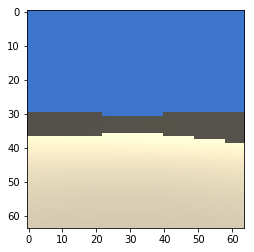

In [35]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [36]:
frame[0].mean()

0.6215779

In [37]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-1.6064  0.7923 -0.29   -0.6791 -0.107  -0.0178  1.1349  1.3782  0.8023 -0.3896  1.2681  0.1545
  0.3938  0.9133 -0.1133 -0.756  -0.6696 -0.7334  0.6038 -1.11   -0.4506 -1.8155 -0.0498  0.1046
 -1.8642  1.2955  0.1845  2.7789  1.3992  0.0656  1.0149  0.9596]


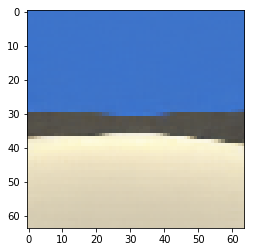

In [38]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()